Repo card metadata block was not found. Setting CardData to empty.


DatasetDict({
    train: Dataset({
        features: ['type', 'seq', 'timestamp', 'taget_seq', 'taget', 'mac', 'rssi', 'rate', 'sig_mode', 'mcs', 'cwb', 'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi', 'noise_floor', 'ampdu_cnt', 'channel_primary', 'channel_secondary', 'local_timestamp', 'ant', 'sig_len', 'rx_state', 'len', 'first_word_invalid', 'data'],
        num_rows: 232941
    })
})
['type', 'seq', 'timestamp', 'taget_seq', 'taget', 'mac', 'rssi', 'rate', 'sig_mode', 'mcs', 'cwb', 'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi', 'noise_floor', 'ampdu_cnt', 'channel_primary', 'channel_secondary', 'local_timestamp', 'ant', 'sig_len', 'rx_state', 'len', 'first_word_invalid', 'data']
dict_keys(['type', 'seq', 'timestamp', 'taget_seq', 'taget', 'mac', 'rssi', 'rate', 'sig_mode', 'mcs', 'cwb', 'smoothing', 'not_sounding', 'aggregation', 'stbc', 'fec_coding', 'sgi', 'noise_floor', 'ampdu_cnt', 'channel_primary', 'channel_secondary', 'local

Epoch 1/20: 100%|██████████| 11647/11647 [05:30<00:00, 35.19it/s]


Epoch 1 – Train Loss: 0.4271


Epoch 2/20: 100%|██████████| 11647/11647 [05:38<00:00, 34.38it/s]


Epoch 2 – Train Loss: 0.3926


Epoch 3/20: 100%|██████████| 11647/11647 [05:19<00:00, 36.40it/s]


Epoch 3 – Train Loss: 0.3817


Epoch 4/20: 100%|██████████| 11647/11647 [05:17<00:00, 36.70it/s]


Epoch 4 – Train Loss: 0.3746


Epoch 5/20: 100%|██████████| 11647/11647 [05:43<00:00, 33.90it/s]


Epoch 5 – Train Loss: 0.3688


Epoch 6/20: 100%|██████████| 11647/11647 [05:28<00:00, 35.50it/s]


Epoch 6 – Train Loss: 0.3655


Epoch 7/20: 100%|██████████| 11647/11647 [05:29<00:00, 35.32it/s]


Epoch 7 – Train Loss: 0.3615


Epoch 8/20: 100%|██████████| 11647/11647 [05:28<00:00, 35.42it/s]


Epoch 8 – Train Loss: 0.3585


Epoch 9/20: 100%|██████████| 11647/11647 [05:31<00:00, 35.17it/s]


Epoch 9 – Train Loss: 0.3556


Epoch 10/20: 100%|██████████| 11647/11647 [05:29<00:00, 35.34it/s]


Epoch 10 – Train Loss: 0.3535


Epoch 11/20: 100%|██████████| 11647/11647 [05:29<00:00, 35.31it/s]


Epoch 11 – Train Loss: 0.3508


Epoch 12/20: 100%|██████████| 11647/11647 [05:34<00:00, 34.86it/s]


Epoch 12 – Train Loss: 0.3487


Epoch 13/20: 100%|██████████| 11647/11647 [05:28<00:00, 35.43it/s]


Epoch 13 – Train Loss: 0.3473


Epoch 14/20: 100%|██████████| 11647/11647 [05:29<00:00, 35.38it/s]


Epoch 14 – Train Loss: 0.3449


Epoch 15/20: 100%|██████████| 11647/11647 [05:30<00:00, 35.20it/s]


Epoch 15 – Train Loss: 0.3441


Epoch 16/20: 100%|██████████| 11647/11647 [05:29<00:00, 35.29it/s]


Epoch 16 – Train Loss: 0.3424


Epoch 17/20: 100%|██████████| 11647/11647 [05:28<00:00, 35.42it/s]


Epoch 17 – Train Loss: 0.3412


Epoch 18/20: 100%|██████████| 11647/11647 [05:28<00:00, 35.47it/s]


Epoch 18 – Train Loss: 0.3399


Epoch 19/20: 100%|██████████| 11647/11647 [05:27<00:00, 35.51it/s]


Epoch 19 – Train Loss: 0.3384


Epoch 20/20: 100%|██████████| 11647/11647 [05:29<00:00, 35.32it/s]


Epoch 20 – Train Loss: 0.3376

Classification Report:
              precision    recall  f1-score   support

     No Fall       0.85      0.84      0.84     23261
        Fall       0.84      0.85      0.84     23328

    accuracy                           0.84     46589
   macro avg       0.84      0.84      0.84     46589
weighted avg       0.84      0.84      0.84     46589



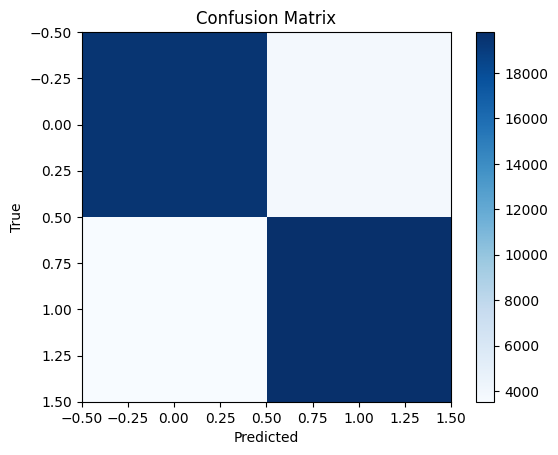

In [ ]:
!pip install torch torchvision torchaudio numpy pandas scipy scikit-learn librosa matplotlib tqdm datasets

In [11]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from datasets import load_dataset
import ast
import seaborn as sns

In [ ]:
dataset_hf = load_dataset("RS2002/WiFall")
print(dataset_hf)

print(dataset_hf["train"].column_names)
print(dataset_hf["train"][0].keys())

In [ ]:
os.makedirs("wifall_data/fall", exist_ok=True)
os.makedirs("wifall_data/no_fall", exist_ok=True)

for i, row in enumerate(dataset_hf["train"]):
    label = row["taget"].lower()

    data_list = ast.literal_eval(row["data"])
    arr = np.array(data_list, dtype=np.float32)
    if label == "fall":
        np.save(f"wifall_data/fall/fall_{i}.npy", arr)
    else:
        np.save(f"wifall_data/no_fall/no_fall_{i}.npy", arr)

In [ ]:
class CSIDataset(Dataset):
    def __init__(self, root_dir):
        self.samples = []
        self.labels = []
        self.label_map = {"no_fall":0, "fall":1}
        for label in ["no_fall","fall"]:
            folder = os.path.join(root_dir, label)
            for f in os.listdir(folder):
                if f.endswith(".npy"):
                    self.samples.append(os.path.join(folder,f))
                    self.labels.append(self.label_map[label])

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        data = np.load(self.samples[idx])

        if data.ndim == 1:
            data = np.expand_dims(data, axis=0)
        if data.ndim == 2 and data.shape[0] > data.shape[1]:
            data = data.T

        signal = data.mean(axis=0)
        padded_signal_length = 128
        if signal.shape[0] < padded_signal_length:
            padding = padded_signal_length - signal.shape[0]
            signal = np.pad(signal, (0, padding), mode='constant')
        elif signal.shape[0] > padded_signal_length:
            signal = signal[:padded_signal_length]

        S = np.abs(librosa.stft(signal, n_fft=64, hop_length=32))
        S = (S - S.mean()) / (S.std() + 1e-6)
        S = np.expand_dims(S, axis=0).astype(np.float32)
        y = self.labels[idx]
        return torch.tensor(S), torch.tensor(y, dtype=torch.long)

In [ ]:
dataset = CSIDataset("wifall_data")
train_idx, val_idx = train_test_split(list(range(len(dataset))),
                                      test_size=0.2,
                                      stratify=dataset.labels)
train_ds = torch.utils.data.Subset(dataset, train_idx)
val_ds   = torch.utils.data.Subset(dataset, val_idx)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False)

In [ ]:
class FallCNN(nn.Module):
    def __init__(self):
        super(FallCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1,16,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16,32,3,padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32,64,3,padding=1), nn.ReLU(), nn.AdaptiveAvgPool2d((4,4))
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*4*4,128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128,2)
        )

    def forward(self,x):
        x = self.features(x)
        return self.classifier(x)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FallCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(20):
    model.train()
    total_loss = 0
    for X,y in tqdm(train_loader, desc=f"Epoch {epoch+1}/20"):
        X, y = X.to(device), y.to(device)
        out = model(X)
        loss = criterion(out,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} – Train Loss: {total_loss/len(train_loader):.4f}")


========== Evaluation Metrics ==========
Accuracy     : 84.19%
Precision    : 83.77%
Recall (TPR) : 84.88%
Specificity  : 83.51%
Sensitivity  : 84.88%
F1-Score     : 84.32%
AUC (ROC)    : 92.37%

Detailed Report:

              precision    recall  f1-score   support

     No Fall       0.85      0.84      0.84     23261
        Fall       0.84      0.85      0.84     23328

    accuracy                           0.84     46589
   macro avg       0.84      0.84      0.84     46589
weighted avg       0.84      0.84      0.84     46589



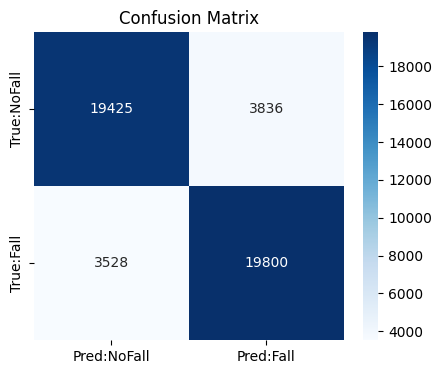

In [15]:
from sklearn.metrics import precision_recall_curve

model.eval()
y_true, y_pred, y_prob = [], [], []
with torch.no_grad():
    for X, y in val_loader:
        X, y = X.to(device), y.to(device)
        out = model(X)
        probs = torch.softmax(out, dim=1)[:, 1]
        preds = torch.argmax(out, dim=1)
        y_true.extend(y.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_prob.extend(probs.cpu().numpy())

# Compute metrics
acc = accuracy_score(y_true, y_pred) * 100
prec = precision_score(y_true, y_pred) * 100
rec = recall_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred) * 100
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = (tn / (tn + fp)) * 100
sensitivity = (tp / (tp + fn)) * 100
auc = roc_auc_score(y_true, y_prob) * 100
fpr, tpr, _ = roc_curve(y_true, y_prob)
precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)

print("\n========== Evaluation Metrics ==========")
print(f"Accuracy     : {acc:.2f}%")
print(f"Precision    : {prec:.2f}%")
print(f"Recall (TPR) : {rec:.2f}%")
print(f"Specificity  : {specificity:.2f}%")
print(f"Sensitivity  : {sensitivity:.2f}%")
print(f"F1-Score     : {f1:.2f}%")
print(f"AUC (ROC)    : {auc:.2f}%")

print("\nDetailed Report:\n")
print(classification_report(y_true, y_pred, target_names=["No Fall", "Fall"]))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred:NoFall", "Pred:Fall"],
            yticklabels=["True:NoFall", "True:Fall"])
plt.title("Confusion Matrix")
plt.show()

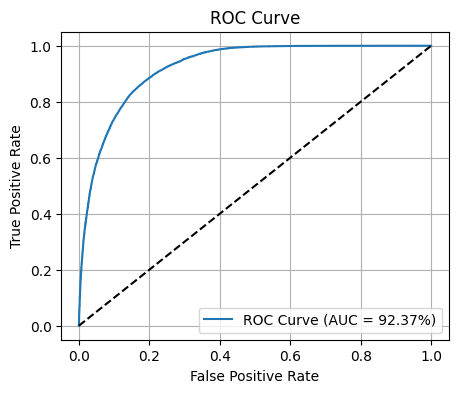

In [16]:
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f}%)")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

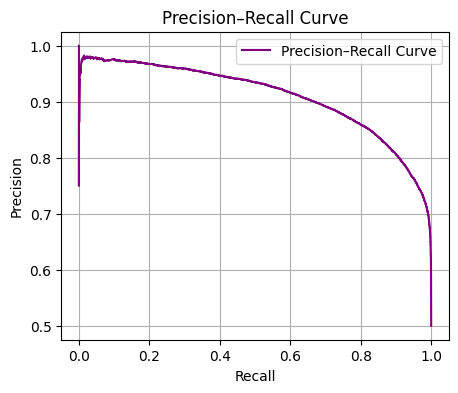

In [17]:
plt.figure(figsize=(5,4))
plt.plot(recalls, precisions, color='purple', label="Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

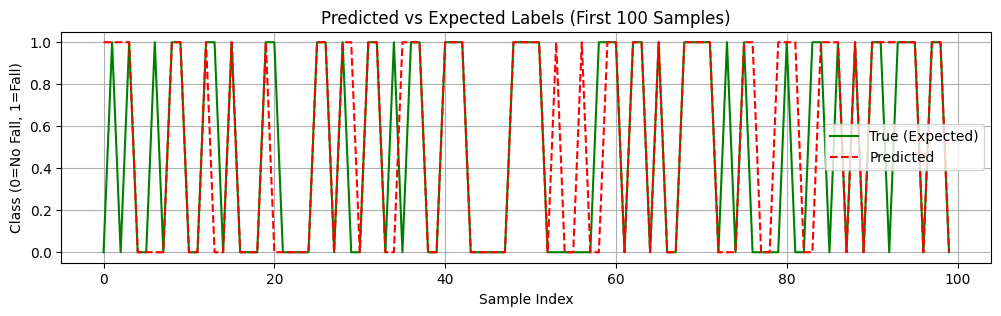

In [18]:
plt.figure(figsize=(12,3))
plt.plot(y_true[:100], 'g-', label='True (Expected)')
plt.plot(y_pred[:100], 'r--', label='Predicted')
plt.title("Predicted vs Expected Labels (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0=No Fall, 1=Fall)")
plt.legend()
plt.grid(True)
plt.show()

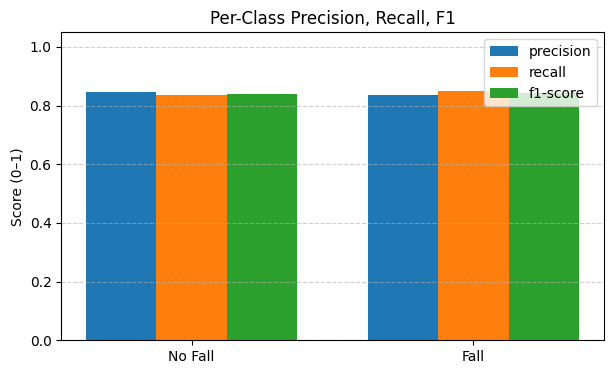

In [19]:
report = classification_report(y_true, y_pred, output_dict=True)
classes = ["No Fall", "Fall"]
metrics = ["precision", "recall", "f1-score"]
values = [[report[c][m] for c in ['0','1']] for m in metrics]

plt.figure(figsize=(7,4))
x = np.arange(len(classes))
bar_width = 0.25
for i, m in enumerate(metrics):
    plt.bar(x + i*bar_width, values[i], width=bar_width, label=m)
plt.xticks(x + bar_width, classes)
plt.ylabel("Score (0–1)")
plt.ylim(0, 1.05)
plt.title("Per-Class Precision, Recall, F1")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()